## <font color='white'>Set-Up Libraries</font>

In [1]:
import os
import pandas as pd

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Tells matplotlib to embed plots within the notebook
%matplotlib inline

---

# <font color='black'>Data extraction and visualisation</font>

## Clean up of the database

In [2]:
bdd_url = "https://paleobiodb.org/data1.2/specs/list.csv?taxon_reso=family&idqual=certain&abundance=count:20&show=full,acconly&all_records"

Let's import the data from the csv file into the code

In [3]:
saved_data = os.path.join('.data', 'dino_data.pickle')
if os.path.isfile(saved_data):
    dino = pd.read_pickle(saved_data)
else:
    dino = pd.read_csv(bdd_url, low_memory=False)
    os.mkdir('.data')
    dino.to_pickle(saved_data)

In [4]:
dino.head()

,specimen_no,record_type,flags,occurrence_no,reid_no,collection_no,specimen_id,is_type,specelt_no,specimen_side,...,collection_type,collection_methods,museum,collection_coverage,collection_size,rock_censused,collectors,collection_dates,collection_comments,taxonomy_comments
0,115,spm,NaN,163286,0,14558,NaN,NaN,NaN,NaN,...,taxonomic,"bulk,surface (float),sieve,field collection",NaN,NaN,1044 specimens,NaN,"J. Storer, T. Tokaryk",1984,NaN,NaN
1,118,spm,NaN,163252,0,14549,NaN,NaN,NaN,NaN,...,taxonomic,"bulk,surface (float),sieve,field collection",UCMP,NaN,217 specimens,NaN,NaN,NaN,NaN,this appears to actually post-date Archibald a...
2,636,spm,NaN,163293,0,14558,NaN,NaN,NaN,NaN,...,taxonomic,"bulk,surface (float),sieve,field collection",NaN,NaN,1044 specimens,NaN,"J. Storer, T. Tokaryk",1984,NaN,NaN
3,640,spm,NaN,163415,0,14585,NaN,NaN,NaN,NaN,...,general faunal/floral,"bulk,surface (float),sieve,field collection",UCMP,NaN,NaN,NaN,W. A. Clemens,NaN,NaN,"this is NOT Hatcher's locality No. 2, which is..."
4,651,spm,NaN,163416,0,14585,NaN,NaN,NaN,NaN,...,general faunal/floral,"bulk,surface (float),sieve,field collection",UCMP,NaN,NaN,NaN,W. A. Clemens,NaN,NaN,"this is NOT Hatcher's locality No. 2, which is..."


In [5]:
dino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 100 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   specimen_no          12181 non-null  int64  
 1   record_type          12181 non-null  object 
 2   flags                0 non-null      float64
 3   occurrence_no        12181 non-null  int64  
 4   reid_no              12181 non-null  int64  
 5   collection_no        12181 non-null  int64  
 6   specimen_id          10520 non-null  object 
 7   is_type              2390 non-null   object 
 8   specelt_no           0 non-null      float64
 9   specimen_side        2438 non-null   object 
 10  specimen_part        11780 non-null  object 
 11  specimen_sex         202 non-null    object 
 12  n_measured           12181 non-null  int64  
 13  measurement_source   10966 non-null  object 
 14  magnification        338 non-null    float64
 15  comments             740 non-null  

We can see a lot of column that have null or missing values. Thoses will not bu useful for the study, we delete those. We can also see some other columns that do not have any influence on the specimen, such as the authors, the publication date, etc.. We also delete those. This database is quite complete. We also need to think about the fact that a newly discovered fossile would not necessarily contains all these infos. We delete a few more columns.

We also notice "geoplate". As we don't know what is it corresponding to, we prefer to remove it. Motility, life_habit, vision and diet are not data that can be collected on the fossile so we remove it as well.

We remove specimen_part because sometimes it can be quite hard to distinguate when finding a new fossile.

In [6]:
dino = dino.drop(['specimen_part', 'specimen_no', 'occurrence_no', 'collection_no', 'accepted_no', 'abund_unit', 'abund_value', 'n_measured', 'reid_no', 'record_type', 'collection_type', 'collection_methods', 'stratscale', 'cc', 'cc.1', 'paleomodel', 'geogscale', 'latlng_precision', 'latlng_basis', 'collection_name', 'reference_no', 'ref_author', 'ref_pubyr', 'accepted_rank', 'accepted_name', 'measurement_source', 'specimen_id', 'is_type', 'specimen_side', 'flags', 'specelt_no', 'specimen_sex', 'magnification', 'comments', 'plant_organ', 'plant_organ2', 'taxon_environment', 'environment_basis', 'reproduction', 'ontogeny', 'ecospace_comments', 'architecture', 'thickness', 'reinforcement', 'collection_subset', 'collection_aka', 'state', 'county', 'geogcomments', 'protected', 'formation', 'stratgroup', 'member', 'zone', 'localsection', 'localbed', 'localorder', 'regionalsection', 'regionalbed', 'regionalorder', 'stratcomments', 'lithdescript', 'lithadj1', 'minor_lithology1', 'fossilsfrom1', 'lithology2', 'lithadj2', 'lithification2', 'minor_lithology2', 'fossilsfrom2', 'tectonic_setting', 'geology_comments', 'museum', 'collection_coverage', 'collection_size', 'rock_censused', 'collectors', 'collection_dates', 'collection_comments', 'taxonomy_comments', "motility", "life_habit", "vision", "diet"], axis=1)

In [7]:
dino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_ma          12181 non-null  float64
 1   min_ma          12181 non-null  float64
 2   phylum          12181 non-null  object 
 3   class           12181 non-null  object 
 4   order           12181 non-null  object 
 5   family          12181 non-null  object 
 6   genus           12175 non-null  object 
 7   composition     11988 non-null  object 
 8   lng             12181 non-null  float64
 9   lat             12181 non-null  float64
 10  paleolng        12021 non-null  float64
 11  paleolat        12021 non-null  float64
 12  geoplate        12181 non-null  object 
 13  lithology1      12129 non-null  object 
 14  lithification1  10049 non-null  object 
 15  environment     12147 non-null  object 
dtypes: float64(6), object(10)
memory usage: 1.5+ MB


We'll now remove the specimen with missing features

In [8]:
dino = dino.dropna()

We're looking for one of the following: phylum, class, order, family, genus. If we're looking for the phylum, we delete the others

In [9]:
used_type = "phylum"

In [10]:
dino[used_type].value_counts()

Mollusca       4664
Brachiopoda    4112
Arthropoda      950
Chordata         26
Name: phylum, dtype: int64

In [11]:
all_types = ["phylum", "class", "order", "family", "genus"]
all_types.remove(used_type)
dino = dino.drop(all_types, axis=1)

nb_attr = len(dino[used_type].value_counts())

It can be useful to take a look at the different values the objects can take.

In [12]:
dino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 31 to 12072
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_ma          9752 non-null   float64
 1   min_ma          9752 non-null   float64
 2   phylum          9752 non-null   object 
 3   composition     9752 non-null   object 
 4   lng             9752 non-null   float64
 5   lat             9752 non-null   float64
 6   paleolng        9752 non-null   float64
 7   paleolat        9752 non-null   float64
 8   geoplate        9752 non-null   object 
 9   lithology1      9752 non-null   object 
 10  lithification1  9752 non-null   object 
 11  environment     9752 non-null   object 
dtypes: float64(6), object(6)
memory usage: 990.4+ KB


In [13]:
dino.describe()

,max_ma,min_ma,lng,lat,paleolng,paleolat
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,239.212897,233.349418,8.097060,27.135280,23.539004,0.878599
std,70.882155,70.695724,80.623424,25.554858,57.398176,31.328881
min,0.011700,0.000000,-124.864998,-45.906330,-169.240000,-89.010000
25%,208.500000,201.300000,-76.116669,7.386000,-31.040000,-23.770000
50%,265.100000,259.900000,16.123182,35.394722,28.340000,3.460000
75%,279.300000,272.300000,70.001663,46.340000,53.250000,26.940000
max,388.100000,383.700000,170.980576,81.070000,167.790000,85.570000


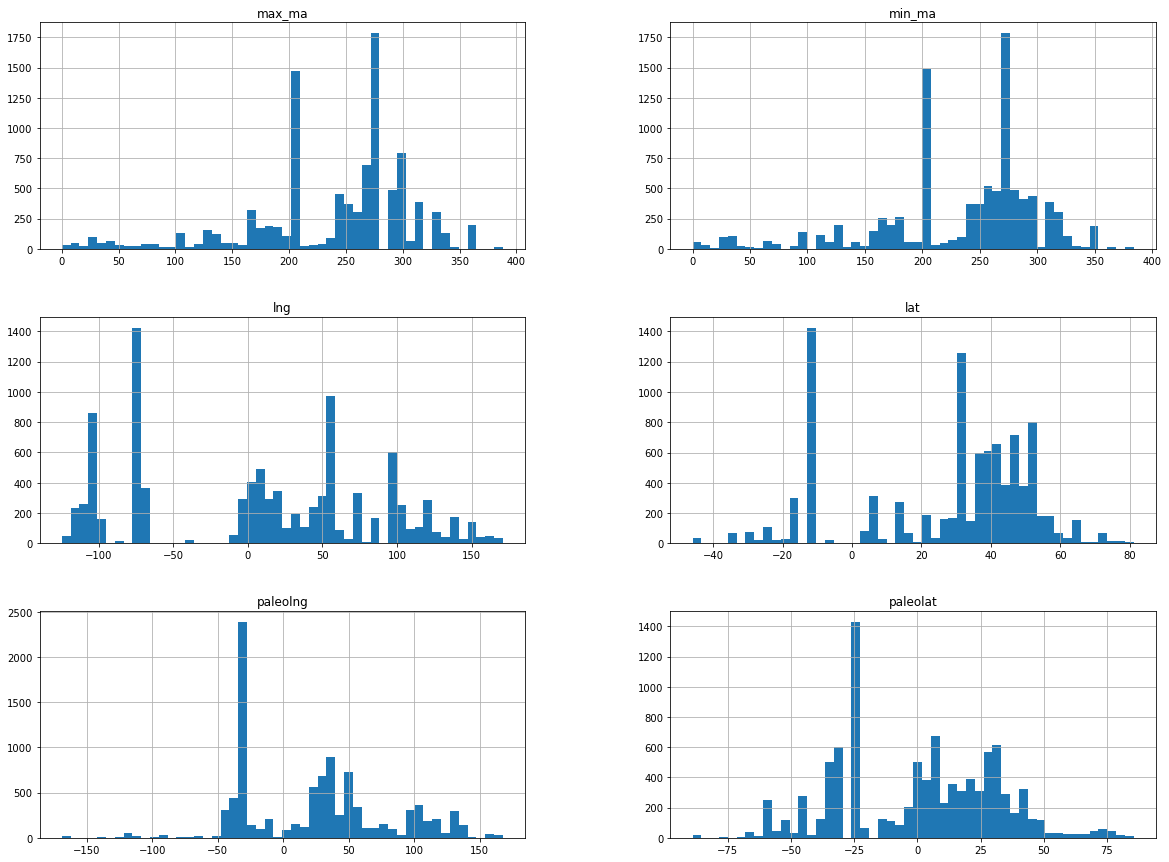

In [14]:
dino.hist(bins=50, figsize=(20,15))
plt.show()

## Visualize the Data

<AxesSubplot:xlabel='paleolng', ylabel='paleolat'>

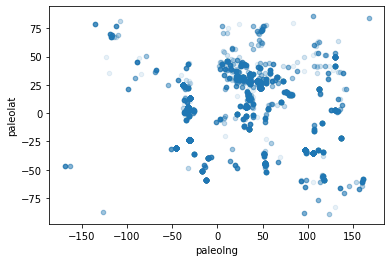

In [15]:
dino.plot(kind="scatter", x='paleolng', y='paleolat', alpha=0.1)

## Looking for correlations

In [16]:
corr_matrix = dino.corr()

corr_matrix["paleolng"].sort_values(ascending=False)

paleolng    1.000000
lng         0.823227
lat         0.167487
min_ma      0.047496
max_ma      0.040542
paleolat    0.006160
Name: paleolng, dtype: float64

array([[<AxesSubplot:xlabel='lng', ylabel='lng'>,
        <AxesSubplot:xlabel='lat', ylabel='lng'>,
        <AxesSubplot:xlabel='paleolng', ylabel='lng'>,
        <AxesSubplot:xlabel='paleolat', ylabel='lng'>],
       [<AxesSubplot:xlabel='lng', ylabel='lat'>,
        <AxesSubplot:xlabel='lat', ylabel='lat'>,
        <AxesSubplot:xlabel='paleolng', ylabel='lat'>,
        <AxesSubplot:xlabel='paleolat', ylabel='lat'>],
       [<AxesSubplot:xlabel='lng', ylabel='paleolng'>,
        <AxesSubplot:xlabel='lat', ylabel='paleolng'>,
        <AxesSubplot:xlabel='paleolng', ylabel='paleolng'>,
        <AxesSubplot:xlabel='paleolat', ylabel='paleolng'>],
       [<AxesSubplot:xlabel='lng', ylabel='paleolat'>,
        <AxesSubplot:xlabel='lat', ylabel='paleolat'>,
        <AxesSubplot:xlabel='paleolng', ylabel='paleolat'>,
        <AxesSubplot:xlabel='paleolat', ylabel='paleolat'>]], dtype=object)

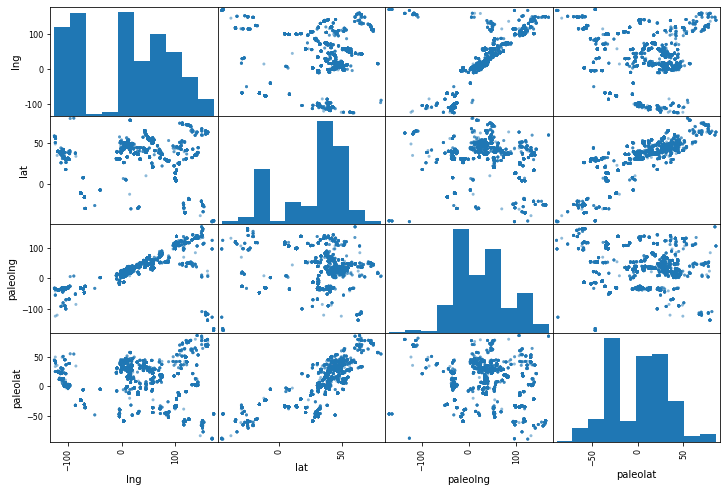

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["lng", "lat", "paleolng", "paleolat"]
scatter_matrix(dino[attributes], figsize=(12, 8))


As longitude and latitude are highly correlated to paleolng and paleolat, we remove those from the dataset. 

In [18]:
dino = dino.drop(["lng", "lat"], axis=1)

## Transformations

In [19]:
dino_labels = dino[[used_type]].copy()
dino = dino.drop(used_type, axis=1)

In the next steps, we'll first apply a feature scaling on the numerical data. It is done because ML algorithms don't preform well when the input numerical attributes have very different scales. We'll use the MinMaxScaling to normalize the data. After this step is done, we'll handle the categorical attributes using the OneHotEncoder from sklearn. This encoder will put only one attribute to 1 while all the others are put to 0. It'll also create new "dummy" attributes. (One for each of the values taken by the categorical attribute)

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
encoder_label = OneHotEncoder()

# Get all numerical and categorical attributes
num_attributes = ['paleolat', 'paleolng', 'max_ma', 'min_ma']
cat_attributes = ['composition', 'lithology1', 'lithification1', 'environment']

pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attributes), 
    ("cat", OneHotEncoder(), cat_attributes),
])

dino_prep = pipeline.fit_transform(dino)
dino_labels_prep = encoder_label.fit_transform(dino_labels).toarray()

## Create test set

TODO: Explain 20% test set + why we are using one

In [21]:
train_set, test_set, train_labels, test_labels = train_test_split(dino_prep, dino_labels_prep, test_size=0.2, random_state=42)
print(f"Number of features: {train_set.shape[1]}")
print(f"Number of output classes: {train_labels.shape[1]}")
print(f"Size of the train set: {train_set.shape[0]}")
print(f"Size of the test set: {test_set.shape[0]}")

Number of features: 89
Number of output classes: 4
Size of the train set: 7801
Size of the test set: 1951


# Create and test a Machine Learning model

Those three variables are the number of neurons in each layer of the network. The first layer has the same size that the number of feature. The neural network has one output corresponding to each class and it will be constructed with only one hidden layer which have a size equal to the mean of the input and the output.

In [22]:
first_layer = train_set.shape[1]
mid_layer = int((first_layer + nb_attr) / 2)
final_layer = nb_attr

## Using sklearn

_Note: We are using sklearn only for comparison purpose, none of the results will be used later._

First we create a basic classifier using perceptrons and train it using the fit method.

In [23]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(first_layer, mid_layer, final_layer), max_iter = 500, random_state=42)
clf.fit(train_set, train_labels)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(89, 46, 4), max_iter=500,
              random_state=42, solver='lbfgs')

In [24]:
print(f'Result on the training set {100 * clf.score(train_set, train_labels)}  %')
print(f'Result on the testing set {100 * clf.score(test_set, test_labels)}  %')

Result on the training set 99.9359056531214  %
Result on the testing set 99.79497693490518  %


## Without machine learning libraries

### Definition of the optimisation problem

First, we are going to create a basic cost function, this is a very important step as the minimum of this function will be the weights used for the network. To improve the learning rate, we will not use the sigmoid activation function, because it leads to poor performance in terms of convergence and computation time..

#### Activation functions

For the two first layers, we are going to use the ReLU function, which is defined by: 
$$
    f(z) = 
    \begin{cases}
         0\text{ if } z < 0 \\
         z\text{ otherwise}
    \end{cases}
$$

In [25]:
def ReLU(x):
    return np.maximum(x, 0)

In [26]:
def ReLUGradient(x):
    if x < 0:
        return 0
    return 1

And for the final layer, the softmax function will be used. This function also allows us to have a probablility distribution on the output. In other words, it means that the network is now able to tell the percentage of probability of belonging to each class.



With $y$ a set, $k$ the length of the set and $x$ a element of the set: 
$$
g(x)_y = \dfrac{e^{x}}{\displaystyle \sum_{i=0}^{k} e^{y_i}} 
$$

We will even use a numericaly stable version of softmax, the stability comes by shifting values to the left so that higher values are now closer to zero.

In [27]:
def softmax(x):
    shifted = x - np.max(x, axis=1)[:,None]
    tmp = np.exp(shifted)
    return tmp / np.sum(tmp, axis=1)[:,None]

In [28]:
def softmaxGradient(x):
    shifted = x - np.max(x)
    tmp = np.exp(shifted)
    return tmp / np.sum(tmp)

#### Helpers functions

We also define to helper functions, the first simply add ones on top of an vector and the second one retreive weight matrices from the weight vector used by scipy.

In [29]:
def add_ones(arr):
    return np.hstack((np.ones((arr.shape[0], 1)), arr))

def get_weight_matrix_from_vector(vector, input_layer_size, hidden_layer_size, num_labels):
    nb_weights_first_layer = hidden_layer_size * (input_layer_size + 1)
    nb_weights_second_layer = num_labels * (hidden_layer_size + 1)
    nb_weights_last_layer = num_labels * (num_labels + 1)
    Theta1 = np.reshape(vector[:nb_weights_first_layer],
                        (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(vector[nb_weights_first_layer: nb_weights_first_layer + nb_weights_second_layer],
                        (num_labels, (hidden_layer_size + 1)))
    
    Theta3 = np.reshape(vector[nb_weights_first_layer + nb_weights_second_layer:],
                        (num_labels, (num_labels + 1)))
    
    return Theta1, Theta2, Theta3

#### Cost function

In [30]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_=0.0):
    # Retrieve each weight matrix from the nn_params vector
    Theta1, Theta2, Theta3 = get_weight_matrix_from_vector(nn_params, input_layer_size, hidden_layer_size, num_labels)
    
    m = y.size
    
    # Compute each step of the neural network
    first_layer = add_ones(X) @ Theta1.T
    first_layer_activated = ReLU(first_layer)
    hidden_layer = add_ones(first_layer_activated) @ Theta2.T
    hidden_layer_activated = ReLU(hidden_layer)
    final_layer = add_ones(hidden_layer_activated) @ Theta3.T
    final_result = softmax(final_layer)

    J = - np.sum(y * np.log(final_result) + (1 - y) * np.log(1 - final_result))
    # For regularization
    J += .5 * lambda_ * (np.sum(Theta1[:,1:] ** 2) + np.sum(Theta2[:,1:] ** 2) + np.sum(Theta3[:,1:] ** 2))
    J /= m
    
#     tmp = final_result - y
#     d1 = ( (tmp @ Theta2)[:,1:] * sigmoidGradient(add_ones(X) @ Theta1.T) ).T @ add_ones(X)
#     d2 = tmp.T @ add_ones(first_layer_activated)
#     d3 = tmp.T @ add_ones(first_layer_activated)
    
#     Theta1_grad = d1 / m
#     Theta2_grad = d2 / m
#     Theta3_grad = d3 / m
#     Theta1_grad[:,1:] = Theta1_grad[:,1:] + lambda_ * Theta1[:,1:] / m
#     Theta2_grad[:,1:] = Theta2_grad[:,1:] + lambda_ * Theta2[:,1:] / m
    
#     grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])

    return J

### Solving the problem

Next, we need to initialize our weights, we are doing it randomly.

In [64]:
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):

    W = np.zeros((L_out, 1 + L_in))
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init

    return W

In [65]:
initial_Theta1 = randInitializeWeights(first_layer, mid_layer)
initial_Theta2 = randInitializeWeights(mid_layer, final_layer)
initial_Theta3 = randInitializeWeights(final_layer, final_layer)

# Creation of the weight vector
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel(), initial_Theta3.ravel()], axis=0)

Pandas uses sparse array to store datas, it is really useful to save memory, however we need to have the full form to use it in our simple model.

In [66]:
train_set_arr = train_set.toarray()
test_set_arr = test_set.toarray()

Now, we are going to minimize the cost function to find optimal weights

In [ ]:
# We are using the same lambda as for the sk-learn version
lambda_ = 1e-5
options= {'maxiter': 100}

costFunction = lambda p: nnCostFunction(p, first_layer, mid_layer, final_layer, train_set_arr, train_labels, lambda_)
# TODO set jac to True and return the gradient from the cost function
res = optimize.minimize(costFunction,initial_nn_params,jac=False, method='L-BFGS-B', options=options)
nn_params = res.x
        
Theta1, Theta2, Theta3 = get_weight_matrix_from_vector(nn_params, first_layer, mid_layer, final_layer)

## Analysis of the model

The predict function apply the neural network, with already computed weights, to a set of input.

In [ ]:
def predict(Theta1, Theta2, Theta3, X):
    h1 = ReLU(add_ones(X) @ Theta1.T)
    h2 = ReLU(add_ones(h1) @ Theta2.T)
    h3 = softmax(add_ones(h2) @ Theta3.T)
    return h3

We also define a score function, as the NN outputs a probability of belonging, score can take advantage of that and find the solution in multiple edducated guesses.

In [ ]:
def score(prediction, result):
    prediction = prediction.copy()
    scored = dict()
    for pred, res in zip(prediction, result):
        for i in range(prediction.shape[1]):
            a_max = np.argmax(pred)
            pred[a_max] = 0
            if res[a_max] == 1:
                scored[i] = scored.get(i, 0) + 1
                break
    return scored
    

### Final results

In [ ]:
pred_train = predict(Theta1, Theta2, Theta3, train_set_arr)
pred_test = predict(Theta1, Theta2, Theta3, test_set_arr)

train_score = score(pred_train, train_labels)
test_score = score(pred_test, test_labels)


print("Result on the training set:")
print(f'\t{train_score[0] / pred_train.shape[0]:.2%} on the first guess')
print(f'\t{train_score[1] / pred_train.shape[0]:.2%} on the second guess')
print(f'\t{train_score[2] / pred_train.shape[0]:.2%} on the third guess')
print(f'\t{train_score[3] / pred_train.shape[0]:.2%} are not guessed in three try')
print("\nResult on the test set:")
print(f'\t{test_score[0] / pred_test.shape[0]:.2%} on the first guess')
print(f'\t{test_score[1] / pred_test.shape[0]:.2%} on the second guess')
print(f'\t{test_score[2] / pred_test.shape[0]:.2%} on the third guess')
print(f'\t{test_score[3] / pred_test.shape[0]:.2%} are not guessed in three try')
